In [169]:
!pip install pandas numpy matplotlib scikit-learn

In [170]:
import pandas as pd
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix



# Ερώτηση 1

         type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0       white            7.0             0.270         0.36            20.7   
1     unknown            6.3             0.300         0.34             1.6   
2       white            8.1             0.280         0.40             6.9   
3     unknown            7.2             0.230         0.32             8.5   
4     unknown            7.2             0.230         0.32             8.5   
...       ...            ...               ...          ...             ...   
6492      red            6.2             0.600         0.08             2.0   
6493      red            5.9             0.550         0.10             2.2   
6494  unknown            6.3             0.510         0.13             2.3   
6495      red            5.9             0.645         0.12             2.0   
6496      red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur 

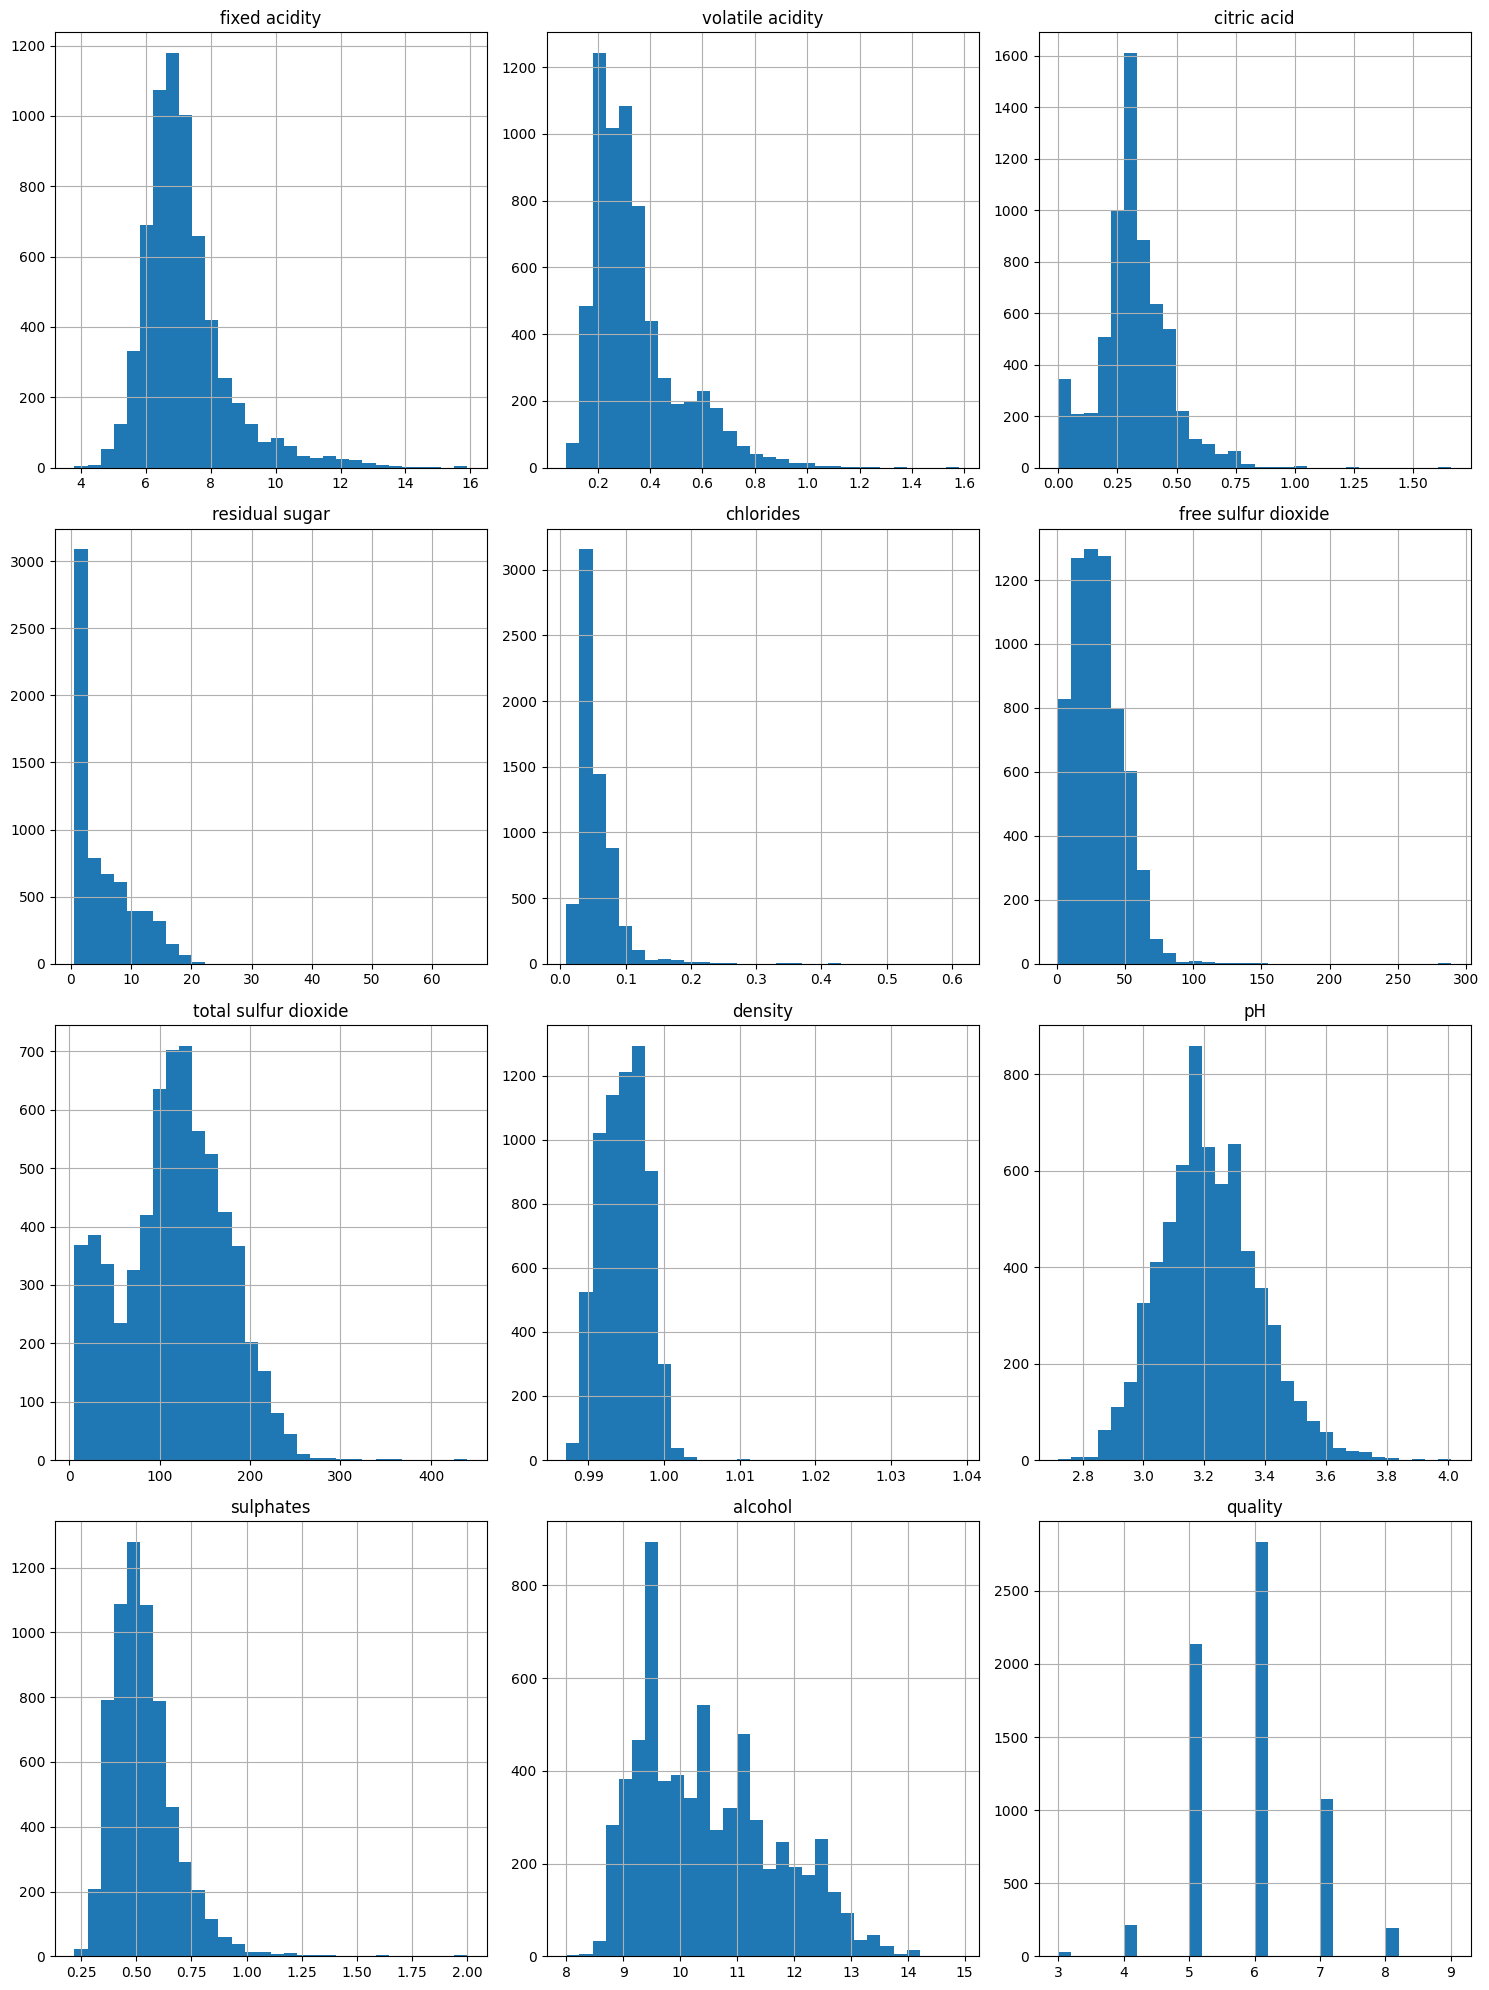

In [171]:
df = pd.read_csv('wine-missing.csv')
print( df )
print( df.columns )
fig, ax = plt.subplots( len( df.columns )//3, 3, figsize=(15,20) )
cnt = 0
for index in range( len( df.columns ) ):
	row = cnt // 3
	col = cnt % 3
	column = df.columns[index]
	if df[column].isnull().sum() > 0:
		print( f"{column} has {df[column].isnull().sum()} missing values")
		mean_value = df[column].mean()
		df[column] = df[column].fillna( mean_value )
	if column != 'type':
		df[column].hist( ax = ax[row][col], bins = 30 )
		ax[row][col].set_title( column )
		cnt += 1

plt.tight_layout()
plt.show()

Θα λέγαμε ότι γενικότερα τα δεδομένα μας βρίσκονται σε καλή κατάσταση με τα περισσότερα να ακολοθούν κανονική ή χ^2 κατανομή με ελάχιστους outliers.

<BarContainer object of 3 artists>

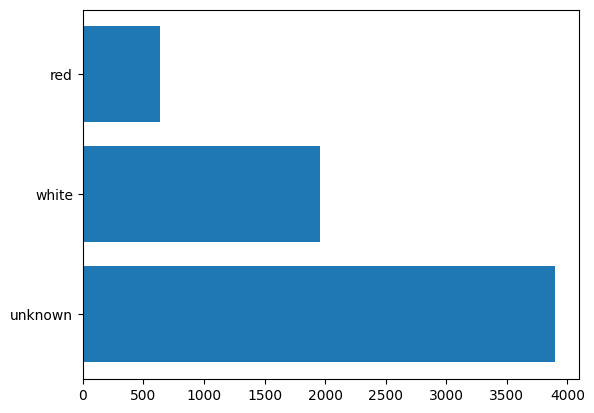

In [172]:
type_counts = df['type'].value_counts()
plt.barh( type_counts.index, type_counts.values)

Βλέπουμε ότι μας λείπουν πάνω από τις μισές τιμές

# Ερώτηση 2-3

In [173]:
type_df = df['type']
type_num = np.zeros( len( type_df ) )

for i in range( len( type_df ) ):
	if type_df[i] == "red":
		type_num[i] = 0
	elif type_df[i] == "white":
		type_num[i] = 1
	else:
		type_num[i] = 2

x_input = df.drop( columns = ["type"] ).to_numpy()

mask_known = ( type_num < 2 )
# mask_known.
x_input_known = x_input[mask_known]
y_input_known = type_num[mask_known]

x_input_uknown = x_input[~mask_known]
y_input_uknown = type_num[~mask_known]

print( y_input_known.shape )

(2599,)


# Ερώτηση 4

In [174]:
seed = 42
test_size = 0.3

In [175]:
x_train, x_test, y_train, y_test = train_test_split( x_input_known, y_input_known, test_size=test_size, random_state = seed, stratify = y_input_known )

# Ερώτηση 5

In [176]:
model = RandomForestClassifier( random_state = seed, n_jobs = -1 )
model.fit( x_train, y_train )

y_predict = model.predict( x_test )

ac_sc = accuracy_score( y_test, y_predict )
pr_sc = precision_score( y_test, y_predict )
re_sc = recall_score( y_test, y_predict )
f1_sc = f1_score( y_test, y_predict )
cm = confusion_matrix(y_test, y_predict)

print( f"Accuracy score: \t{ac_sc}")
print( f"Precision score:\t{pr_sc}")
print( f"Recall score:   \t{re_sc}")
print( f"F1 score:       \t{f1_sc}")

print( cm )


Accuracy score: 	0.9974358974358974
Precision score:	1.0
Recall score:   	0.9965986394557823
F1 score:       	0.9982964224872232
[[192   0]
 [  2 586]]


Γενικά το accuracy δουλεύει καλά μόνο στην περίπτωση που τα δεδομένα είναι ισορροπημένα, κάτι τετοιο δεν συμβαίνει εδώ. Το δείγματα του άσπρου κρασιού είναι πολύ λιγότερα από τα δείγματα του κόκκινου.

# Ερώτηση 6

In [177]:
model = RandomForestClassifier( random_state = seed, class_weight='balanced', n_jobs = -1 )
model.fit( x_train, y_train )

y_predict = model.predict( x_test )

ac_sc = accuracy_score( y_test, y_predict )
pr_sc = precision_score( y_test, y_predict )
re_sc = recall_score( y_test, y_predict )
f1_sc = f1_score( y_test, y_predict )

print( f"Accuracy score: \t{ac_sc}")
print( f"Precision score:\t{pr_sc}")
print( f"Recall score:   \t{re_sc}")
print( f"F1 score:       \t{f1_sc}")

Accuracy score: 	0.9948717948717949
Precision score:	0.9982935153583617
Recall score:   	0.9948979591836735
F1 score:       	0.9965928449744463


Βάζοντας αυτό το όρισμα βοηθάει την επίδοση του ταξινομητή όταν έχουμε μη ισορροπημένες κλάσεις όπως το παράδειγμα μας.

# Ερώτημα 7-8-9-10

In [178]:
p_white = .65
p_red = .35

def createNTrainModel( x_input = x_input_known, y_input = y_input_known ):
    model = RandomForestClassifier( random_state = seed, class_weight = 'balanced', n_jobs = -1 )
    model.fit( x_input, y_input )

    return model


iters = 30
ans = 0
for i in range(iters):
    model = createNTrainModel()
    y_prob = model.predict_proba( x_input_uknown )[:, 1]
    mask_red = y_prob > p_red
    mask_white = y_prob < p_white
    mask_unknown = ~mask_red & ~mask_white
    red_new_samples = mask_red.sum()
    white_new_samples = mask_white.sum()
    if red_new_samples + white_new_samples == 0:
    #all unknown wines have been classified
        break
    x_input_known = np.vstack( [x_input_known, x_input_uknown[mask_red]] )
    y_input_known = np.hstack( [y_input_known, np.zeros( red_new_samples )])

    x_input_known = np.vstack( [x_input_known, x_input_uknown[mask_white]] )
    y_input_known = np.hstack( [y_input_known, np.zeros( white_new_samples )])

    x_input_uknown = x_input_uknown[mask_unknown]
    if x_input_uknown.shape[0] == 0:
        ans = 1
        break

if ans:
    print( "All wines have been classified")
else:
    print( "Not all wines have been classified.")
  


All wines have been classified
